## ML - Project-2 Soldiers Race Classification

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants.The ANSUR II working databases contain 93 anthropometric measurements, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects. 

Firstly, I will try to understand the dataset column by column using pandas module. I will do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

1. Exploratory Data Analysis (EDA)
Import Libraries, Load Dataset, Exploring Data

--> Import Libraries

--> Ingest Data 

--> Explore Data

--> Outlier Detection

--> Drop unnecessary features

2. Data Preprocessing

--> Scale (if needed)

--> Separete the data frame for evaluation purposes

3. Multi-class Classification

--> Import libraries

--> Implement SVM Classifer

--> Implement Decision Tree Classifier

--> Implement Random Forest Classifer

--> Implement XGBoost Classifer

--> Compare The Models

## 1.Exploratory Data Analysis (EDA) Import Libraries, Load Dataset, Exploring Data

In [1]:
# libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Sets the value of the specified option
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
df1=pd.read_csv("ANSUR II Female Public.csv")
df1

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [3]:
df2=pd.read_csv("ANSUR II MALE Public.csv", encoding='latin-1')
df2

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [6]:
df1.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=108)

In [7]:
df2.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=108)

In [8]:
df1.columns == df2.columns

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [9]:
df2.rename(columns={"subjectid" : "SubjectId"},
          inplace = True)

In [10]:
df2.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=108)

In [11]:
frames = [df1, df2]
  
df = pd.concat(frames, axis=0, ignore_index=True)
display(df)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [12]:
df.isnull().sum()

SubjectId                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [13]:
from skimpy import clean_columns

In [14]:
df = clean_columns(df)
df.head(3).T

15 column names have been cleaned

,0,1,2
subject_id,10037,10038,10042
abdominalextensiondepthsitting,231,194,183
acromialheight,1282,1379,1369
acromionradialelength,301,320,329
anklecircumference,204,207,233
axillaheight,1180,1292,1271
balloffootcircumference,222,225,237
balloffootlength,177,178,196
biacromialbreadth,373,372,397
bicepscircumferenceflexed,315,272,300


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,6068.0,20757.198418,13159.390894,10027.0,14841.75,20063.5,27234.50,920103.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0


In [16]:
df.duplicated().sum()

0

In [17]:
drop_list =[]             # ethnicity has too many null values
for col in df: 
    if df[col].isnull().sum()>1800:
        print(f"{col} = {df[col].isnull().sum()}")
        drop_list.append(col)
        
drop_list 

ethnicity = 4647


['ethnicity']

In [18]:
df.drop(drop_list, axis=1, inplace=True)   # I dropped it because it was 76% missing value

In [19]:
df.isnull().sum().any()

False

In [20]:
df.shape

(6068, 107)

In [21]:
for col in df.select_dtypes("object"):            # I want to see how much unique value each categorical feature has
    print(f"{col} has {df[col].nunique()} unique value")

gender has 2 unique value
date has 253 unique value
installation has 12 unique value
component has 3 unique value
branch has 3 unique value
primary_mos has 285 unique value
subjects_birth_location has 152 unique value
writing_preference has 3 unique value


In [22]:
drop_list = [
    "date", "installation", "component", "branch", "primary_mos",
    "weightlbs", "heightin", "subject_id"   
]

df.drop(drop_list, axis=1, inplace=True)   # I dropped them as these features won't provide insight into races

In [23]:
df.shape

(6068, 99)

In [24]:
df.subject_numeric_race.value_counts() # This feature describing target feature 'dod_race'. I will drop it as it will cause data leakage

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
62          8
35          8
64          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
641         2
431         2
423         2
2518        2
451         2
2351        2
318         2
425         1
238         1
358         1
48          1
42351       1
428         1
631         1
4251        1
Name: subject_numeric_race, dtype: int64

In [25]:
df.drop("subject_numeric_race",axis=1,inplace=True)

In [26]:
df.shape

(6068, 98)

In [27]:
df.dod_race.value_counts() # race information, this is target feature and  it's unique classes
                           # I will take the ones larger than 500, I will make a classification over them

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dod_race, dtype: int64

In [28]:
# I rename the numeric data in the target feature according to the ethnic names specified in the document to make it more understandable

df["dod_race"] = df.dod_race.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

In [29]:
df.dod_race.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: dod_race, dtype: int64

In [30]:
df2 = df[(df["dod_race"] == "White") | (df["dod_race"] == "Black") | (df["dod_race"] == "Hispanic")]
df2

# I filter out classes that are more than 500.

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,subjects_birth_location,dod_race,age,writing_preference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,Germany,Black,26,Right hand
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,California,Hispanic,21,Right hand
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,Texas,White,23,Right hand
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,District of Columbia,Black,22,Right hand
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,Texas,White,45,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [31]:
df2.reset_index(drop=True, inplace=True)   # reset the indexes

In [32]:
df2

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,subjects_birth_location,dod_race,age,writing_preference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,Germany,Black,26,Right hand
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,California,Hispanic,21,Right hand
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,Texas,White,23,Right hand
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,District of Columbia,Black,22,Right hand
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,Texas,White,45,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

<AxesSubplot:>

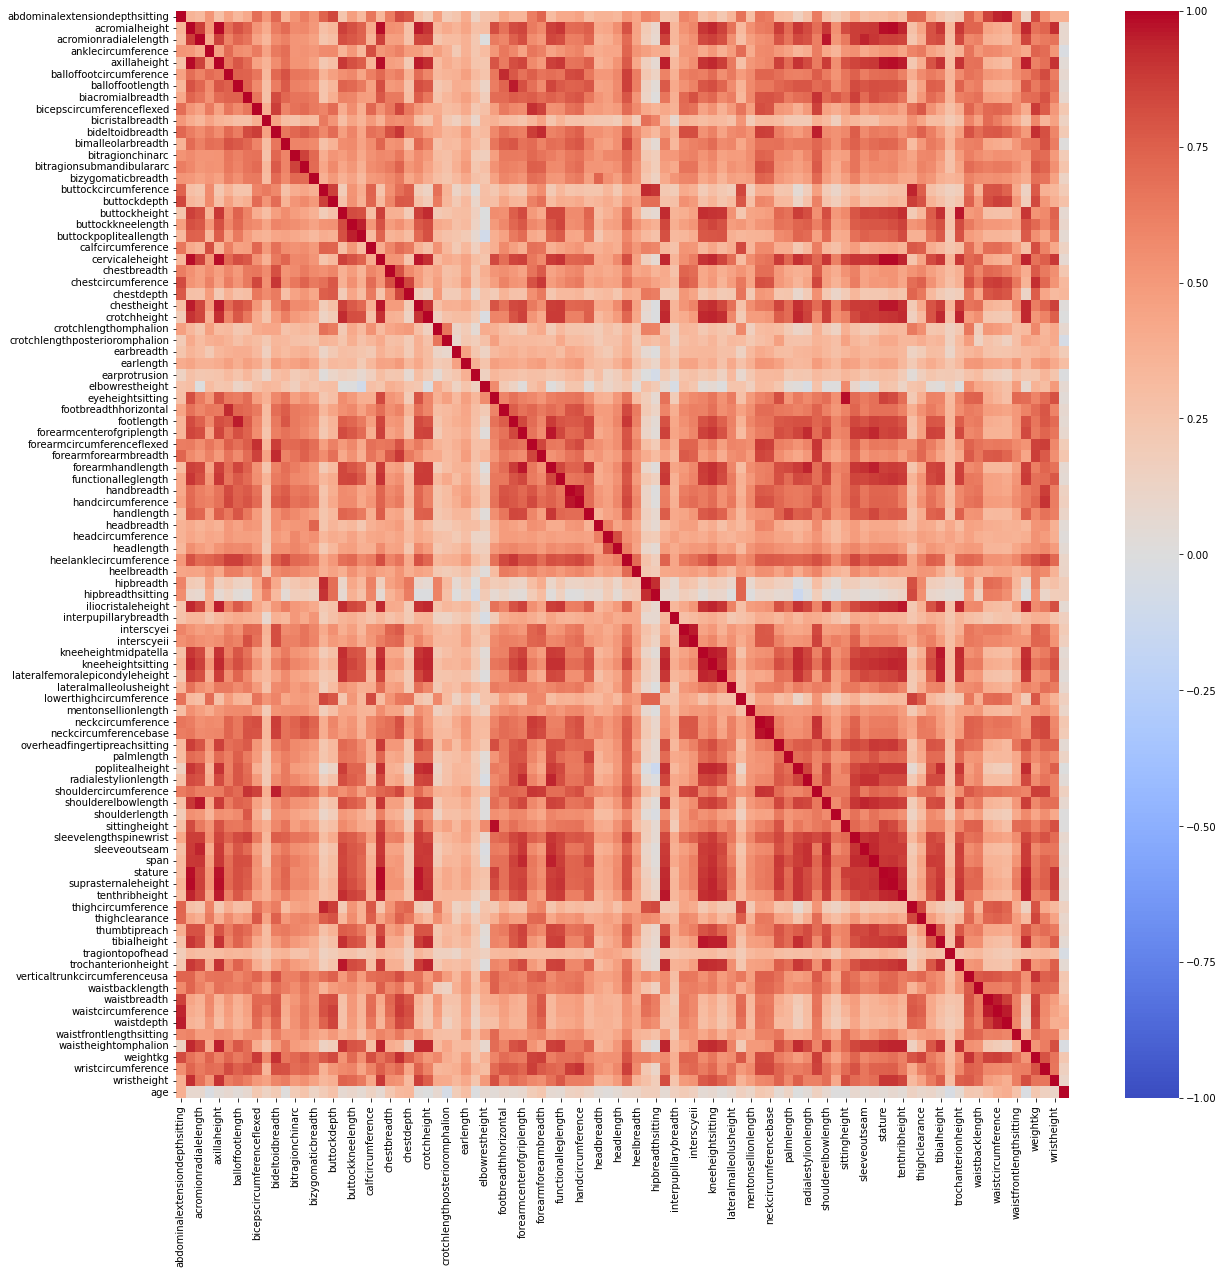

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),vmin=-1, vmax=1, cmap ="coolwarm")

In [34]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.0,247.254290,37.457748,155.0,220.0,243.0,272.0,451.0
acromialheight,5769.0,1408.630265,78.303123,1146.0,1353.0,1412.0,1464.0,1683.0
acromionradialelength,5769.0,328.071590,20.444554,249.0,314.0,328.0,342.0,393.0
anklecircumference,5769.0,225.201768,15.965783,156.0,214.0,225.0,235.0,293.0
axillaheight,5769.0,1301.902583,71.260913,1062.0,1252.0,1304.0,1351.0,1553.0
balloffootcircumference,5769.0,244.408043,16.803556,186.0,233.0,245.0,256.0,306.0
balloffootlength,5769.0,195.118911,13.379000,151.0,186.0,196.0,205.0,245.0
biacromialbreadth,5769.0,399.706015,30.124094,283.0,377.0,404.0,422.0,489.0
bicepscircumferenceflexed,5769.0,341.663027,41.270615,216.0,312.0,342.0,370.0,490.0
bicristalbreadth,5769.0,274.903449,19.239580,197.0,262.0,274.0,288.0,362.0


## 2.DATA Preprocessing

In [35]:
X = df2.drop(columns= ["dod_race"])
y = df2.dod_race

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [37]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


## Modelling

### 1. Logistic model

In [38]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [39]:
cat = X_train.select_dtypes("object").columns   # I need to make object features numeric, I will do one hot encoding
cat 

Index(['gender', 'subjects_birth_location', 'writing_preference'], dtype='object')

In [40]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler 

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",          # I added min max scaler for one hot encoding
                                                      sparse=False), cat),
                                                      remainder=MinMaxScaler(),
                                                      verbose_feature_names_out=False)

In [41]:
from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(class_weight='balanced',   # because it is an imbalanced data set
                                         max_iter=10000,
                                         random_state=101))]

pipe_log_model = Pipeline(steps=operations)

In [42]:
pipe_log_model.fit(X_train,y_train)                            # concentrating on hispanic scores
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[243  11   6]
 [  8 102  26]
 [ 23  99 636]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.48      0.75      0.59       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.77      0.84      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 971   36   31]
 [  19  461   63]
 [  61  357 2616]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



In [43]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [44]:
from sklearn.model_selection import StratifiedKFold

operations = [("OneHotEncoder", column_trans), 
              ("log", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train, 
                        y_train, 
                        scoring=scoring,   
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]                                   # I see scores similar to the scores above, no overfittig but can be improved
                                                       # I will do gridsearch

test_precision_Hispanic     0.504567
train_precision_Hispanic    0.541390
test_recall_Hispanic        0.790000
train_recall_Hispanic       0.852670
test_f1_Hispanic            0.614450
train_f1_Hispanic           0.662271
dtype: float64

## Logistic Model GridsearchCV

In [45]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [46]:
param_grid = {
    "log__C": [0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [47]:
operations = [("OneHotEncoder", column_trans), 
              ("log", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=101))]

model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [ ]:
log_model_grid.fit(X_train,y_train)

In [49]:
log_model_grid.best_estimator_  

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender', 'subjects_birth_location', 'writing_preference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [50]:
pd.DataFrame(log_model_grid.cv_results_).loc[log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score         0.79
mean_train_score    0.852875
Name: 7, dtype: object

In [51]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)  # scores have not changed much, there are small improvements

Test_Set
[[243  11   6]
 [  8 102  26]
 [ 23  99 636]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.48      0.75      0.59       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.77      0.84      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 971   36   31]
 [  19  461   63]
 [  61  357 2616]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



In [52]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


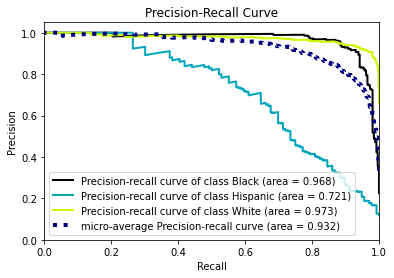

In [53]:
# I will draw a pre recall curve to see the overall performance of the model.

from scikitplot.metrics import plot_roc, plot_precision_recall

operations = [("OneHotEncoder", column_trans), 
              ("log", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [54]:
pd.get_dummies(y_test).values

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [55]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

# 0 black, 1 hispanic, 2 white 
# Here I got hispanic scores with 1

0.7206628356820675

In [56]:
y_pred = log_model_grid.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

# I assign my scores to variables because I will compare them in the table below

## 2. SVC

In [ ]:
# Vanilla SVC model

In [57]:
operations_svc = [("OneHotEncoder", column_trans), 
                  ("svc", SVC(class_weight="balanced",random_state=101))]

pipe_svc_model = Pipeline(steps=operations_svc)

In [58]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  13   7]
 [  7 102  27]
 [ 21 127 610]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.42      0.75      0.54       136
       White       0.95      0.80      0.87       758

    accuracy                           0.82      1154
   macro avg       0.75      0.83      0.77      1154
weighted avg       0.87      0.82      0.84      1154


Train_Set
[[ 959   38   41]
 [  21  458   64]
 [  58  438 2538]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.89      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [59]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv=10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))   
df_scores.mean()[2:]

test_precision_Hispanic     0.450988
train_precision_Hispanic    0.484225
test_recall_Hispanic        0.784411
train_recall_Hispanic       0.843665
test_f1_Hispanic            0.571805
train_f1_Hispanic           0.615236
dtype: float64

## SVC Model GridsearchCV

In [60]:
param_grid = {                        # if C increases, regularization decreases
    'svc__C': [0.5, 1],
    'svc__gamma': ["scale", "auto", 0.01]    # if gamma is high it goes to overfit
}

In [61]:
operations_svc = [("OneHotEncoder", column_trans),
                  ("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [ ]:
svm_model_grid.fit(X_train, y_train)

In [63]:
svm_model_grid.best_estimator_     

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender', 'subjects_birth_location', 'writing_preference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=0.5, class_weight='balanced', random_state=101))])

In [64]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.786229
mean_train_score      0.8275
Name: 0, dtype: object

In [65]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[239  13   8]
 [  8  98  30]
 [ 15 142 601]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92       260
    Hispanic       0.39      0.72      0.50       136
       White       0.94      0.79      0.86       758

    accuracy                           0.81      1154
   macro avg       0.75      0.81      0.76      1154
weighted avg       0.87      0.81      0.83      1154


Train_Set
[[ 934   51   53]
 [  25  452   66]
 [  60  496 2478]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91      1038
    Hispanic       0.45      0.83      0.59       543
       White       0.95      0.82      0.88      3034

    accuracy                           0.84      4615
   macro avg       0.77      0.85      0.79      4615
weighted avg       0.89      0.84      0.85      4615



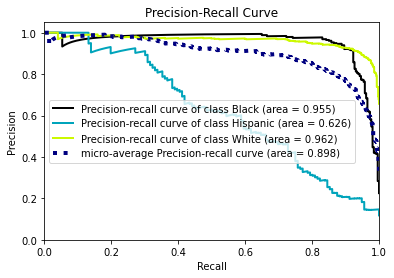

In [66]:
operations = [("OneHotEncoder", column_trans), 
              ("svc", SVC(C=1, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)   # We used desicion_function because it is distance base model

#y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, decision_function)  # svc's race discrimination overall performance was 62%, logistic was better, it was 72%
plt.show();

In [67]:
decision_function

array([[ 2.13897832, -0.22436085,  1.19111424],
       [-0.27214003,  2.23313814,  1.22650871],
       [-0.24338704,  2.20076905,  1.18122438],
       ...,
       [-0.19544182,  0.78487754,  2.25466464],
       [-0.22442036,  1.10858078,  2.20400579],
       [-0.25112175,  2.19820703,  1.20452135]])

In [68]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])  # by distance

0.6259076001511469

In [69]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [70]:
cat

Index(['gender', 'subjects_birth_location', 'writing_preference'], dtype='object')

In [71]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                       remainder='passthrough') # The scaling process is important in the distance base model,it is not important here

In [ ]:
# Vanilla RF Model

In [72]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                     random_state=101))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjects_birth_location', 'writing_preference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [73]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)  # overfitting

Test_Set
[[179   0  81]
 [  6   8 122]
 [  8   0 750]]
              precision    recall  f1-score   support

       Black       0.93      0.69      0.79       260
    Hispanic       1.00      0.06      0.11       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.90      0.58      0.59      1154
weighted avg       0.84      0.81      0.77      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [74]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model,
                        X_train, 
                        y_train,
                        scoring=scoring,
                        cv=5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.761905
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.044207
train_recall_Hispanic       0.999539
test_f1_Hispanic            0.083483
train_f1_Hispanic           0.999769
dtype: float64

## RF Model GridsearchCV

In [75]:
param_grid = {'RF_model__n_estimators':[400,500],
             'RF_model__max_depth':[2,3]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]
             

In [76]:
operations_rf = [("OrdinalEncoder", column_trans),
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             scoring=recall_Hispanic,
                             n_jobs=-1,
                             return_train_score=True)

In [77]:
rf_grid_model.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['gender', 'subjects_birth_location', 'writing_preference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [78]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjects_birth_location', 'writing_preference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=500, random_state=101))])

In [79]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3, 'RF_model__n_estimators': 500}

In [80]:
pd.DataFrame(rf_grid_model.cv_results_).loc[rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.581753
mean_train_score    0.620164
Name: 3, dtype: object

In [81]:
rf_grid_model.best_score_

0.5817533129459734

In [82]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test) # Low according to svc and logistic model scores, not very good now

Test_Set
[[198  41  21]
 [ 22  83  31]
 [ 65 238 455]]
              precision    recall  f1-score   support

       Black       0.69      0.76      0.73       260
    Hispanic       0.23      0.61      0.33       136
       White       0.90      0.60      0.72       758

    accuracy                           0.64      1154
   macro avg       0.61      0.66      0.59      1154
weighted avg       0.77      0.64      0.68      1154


Train_Set
[[ 810  126  102]
 [  57  330  156]
 [ 272  955 1807]]
              precision    recall  f1-score   support

       Black       0.71      0.78      0.74      1038
    Hispanic       0.23      0.61      0.34       543
       White       0.88      0.60      0.71      3034

    accuracy                           0.64      4615
   macro avg       0.61      0.66      0.60      4615
weighted avg       0.76      0.64      0.67      4615



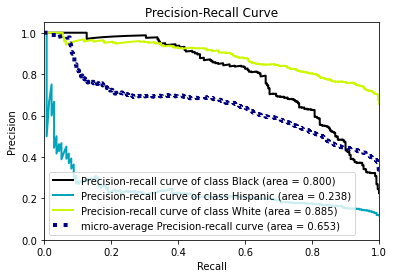

In [83]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     max_depth=2, 
                                                     n_estimators=400, 
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();                                      # It means that 23% can separate black and white.

In [84]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.23787925709365498

In [85]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

In [ ]:
# Vanilla XGBoost Model 

In [86]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

y_train_xgb = y_train.map({"Black":0, "Hispanic":1, "White":2}) # sorting will be the same as classification_report
y_test_xgb = y_test.map({"Black":0, "Hispanic":1, "White":2})
# In xgb 1.6 and higher versions, if the target is not numeric, it returns an error. That's why we do the conversion manually

pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjects_birth_location', 'writing_preference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=N...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [87]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)  # overfit 

Test_Set
[[229   7  24]
 [ 13  54  69]
 [ 13  10 735]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       260
           1       0.76      0.40      0.52       136
           2       0.89      0.97      0.93       758

    accuracy                           0.88      1154
   macro avg       0.85      0.75      0.78      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [88]:
from sklearn.utils import class_weight     # I'm weighting classes
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', 
                                                     y=y_train_xgb)
classes_weights

# Since the XGboost algorithm does not have a weight_class hyper parameter for multiclass data, it can be used in the fit function
# I can use the sample_weight hyper parameter

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [89]:
my_dict = {"weights": classes_weights, "label":y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

,weights,label
958,2.833026,1
265,0.507031,2
4388,0.507031,2
3666,0.507031,2
2721,1.482017,0


In [90]:
comp.groupby("label").value_counts()  # Hispanics are less so weighed more 

label  weights 
0      1.482017    1038
1      2.833026     543
2      0.507031    3034
dtype: int64

In [91]:
pipe_model_xgb.fit(X_train,
                   y_train_xgb,  
                   XGB_model__sample_weight=classes_weights)   
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its 
# instances, which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjects_birth_location', 'writing_preference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=N...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [92]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb) # overfitting

Test_Set
[[231   7  22]
 [ 10  68  58]
 [ 11  29 718]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       260
           1       0.65      0.50      0.57       136
           2       0.90      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.82      0.78      0.80      1154
weighted avg       0.87      0.88      0.88      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [93]:
scoring_xgb = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =[1]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =[1]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =[1])}

# Since xgb doesn't accept categoric targets, I'm editing the scoring_xgb based on the 1 (hispanic) numeric class.

In [94]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, 
                        X_train, 
                        y_train_xgb, 
                        scoring=scoring_xgb,
                        cv=5, 
                        return_train_score=True,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]       # overfitting

test_precision_Hispanic     0.702259
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.436459
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.537672
train_f1_Hispanic           1.000000
dtype: float64

## XGBoost Model GridsearchCV

In [95]:
param_grid = {"XGB_model__n_estimators":[20, 40],       # I'm trying to lower the variance 
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.03, 0.05],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [96]:
operations_xgb = [("OrdinalEncoder", column_trans),
                  ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=make_scorer(recall_score, average = None, labels =[1]),
                              cv=5,
                              n_jobs=-1,
                              return_train_score=True)

In [97]:
xgb_grid_model.fit(X_train,
                   y_train_xgb,
                   XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['gender', 'subjects_birth_location', 'writing_preference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callba...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [98]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjects_birth_location', 'writing_preference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=N...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [99]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 1}

In [100]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.548641
mean_train_score    0.629373
Name: 31, dtype: object

In [101]:
xgb_grid_model.best_score_

0.5486408426775399

In [102]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)  # variance decreased,but my scores are worse,logistics and svc scores are better

Test_Set
[[199  43  18]
 [ 23  85  28]
 [ 71 185 502]]
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       260
           1       0.27      0.62      0.38       136
           2       0.92      0.66      0.77       758

    accuracy                           0.68      1154
   macro avg       0.62      0.68      0.62      1154
weighted avg       0.79      0.68      0.71      1154


Train_Set
[[ 810  129   99]
 [  64  342  137]
 [ 357  639 2038]]
              precision    recall  f1-score   support

           0       0.66      0.78      0.71      1038
           1       0.31      0.63      0.41       543
           2       0.90      0.67      0.77      3034

    accuracy                           0.69      4615
   macro avg       0.62      0.69      0.63      4615
weighted avg       0.77      0.69      0.71      4615



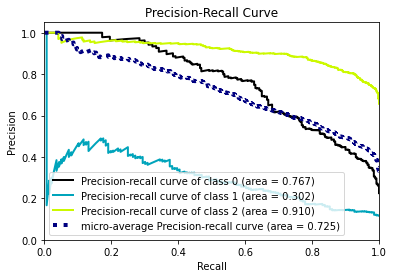

In [103]:
from scikitplot.metrics import plot_roc, precision_recall_curve


operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(colsample_bytree=0.8,
                                              learning_rate=0.05,
                                              max_depth=2,
                                              n_estimators=20,
                                              subsample=0.8,
                                              random_state=101))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, 
          y_train_xgb, 
          XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()                                     # Can distinguish 30%

In [104]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [105]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.3019486353162624

In [106]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

## Comparing Models

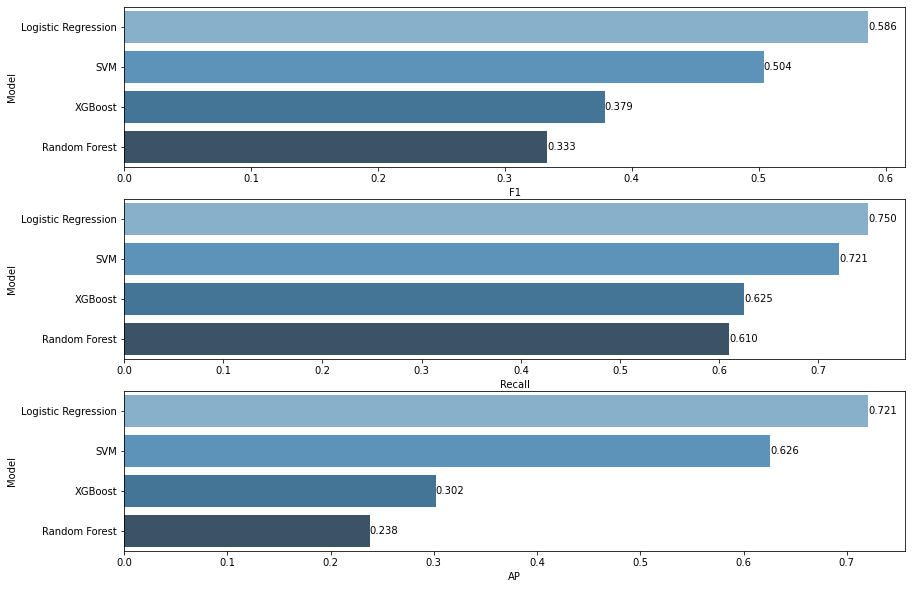

In [107]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();                # Logistic has the best score of all, the model that best captures Hispanics

## Before the Deployment

In [108]:
# I will train my model with all my data

column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", 
                                                            sparse=False), cat),
                                              remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final),
                    ("log", LogisticRegression(class_weight='balanced',
                                               max_iter=10000,
                                               random_state=101))]

final_model = Pipeline(steps=operations_final)

In [109]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender', 'subjects_birth_location', 'writing_preference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [111]:
X[X.gender=="Male"].describe()

# I will make the model predict based on the mean values of all male soldiers in my data

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,age
count,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.00000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,255.449090,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.004360,358.579636,275.632213,510.927674,74.844063,331.655809,315.718389,142.434983,1021.294178,246.362401,889.500385,619.217235,504.001026,392.426520,1519.422160,289.786868,1060.496794,254.390100,1293.040267,847.637599,623.143114,356.354706,36.095153,64.171070,23.109772,244.823544,804.885099,101.893819,271.573993,349.573480,310.528084,580.702231,480.928956,1132.125673,88.379841,212.571172,193.509361,154.183637,574.708130,199.760708,344.002052,72.564504,346.256732,379.948448,1063.412670,639.948705,431.393947,450.628623,489.366504,555.224929,492.625545,73.061554,409.670685,122.684534,398.192101,435.159528,1428.469351,116.610156,430.684791,268.313927,1179.902539,364.305976,149.832265,918.678636,897.179277,594.007951,1816.628879,1758.385483,1440.699667,1122.444473,626.335214,180.739420,813.085407,469.222878,131.116697,902.586817,1666.783278,478.017953,327.110798,943.043344,238.560400,388.017440,1058.239805,858.714286,176.168761,848.762247,30.172352
std,37.295117,62.356906,17.281413,14.579399,58.714251,12.89351,10.329358,19.074837,34.511924,17.512428,32.450260,4.097052,13.970798,16.640502,6.141613,76.330564,26.4

In [113]:
male_mean_human = X[X.gender=="Male"].describe(include="all").loc["mean"]
male_mean_human

# I select the mean values with loc["mean"]
# include="all" for categoric data 
# Since the categorical data will return Nan, I make the following assignments to these categorical observations

abdominalextensiondepthsitting      255.44909
acromialheight                    1442.946397
acromionradialelength              335.819441
anklecircumference                 229.590921
axillaheight                      1331.098487
balloffootcircumference             252.16594
balloffootlength                   201.229546
biacromialbreadth                   416.00436
bicepscircumferenceflexed          358.579636
bicristalbreadth                   275.632213
bideltoidbreadth                   510.927674
bimalleolarbreadth                  74.844063
bitragionchinarc                   331.655809
bitragionsubmandibulararc          315.718389
bizygomaticbreadth                 142.434983
buttockcircumference              1021.294178
buttockdepth                       246.362401
buttockheight                      889.500385
buttockkneelength                  619.217235
buttockpopliteallength             504.001026
calfcircumference                   392.42652
cervicaleheight                   

In [117]:
male_mean_human["gender"] = "Male"
male_mean_human["subjects_birth_location"] = "California"
male_mean_human["writing_preference"] = "Right hand"     # I assigned the categorical ones myself

In [118]:
pd.DataFrame(male_mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,subjects_birth_location,age,writing_preference,Gender,SubjectsBirthLocation,WritingPreference
mean,255.44909,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.00436,358.579636,275.632213,510.927674,74.844063,331.655809,315.718389,142.434983,1021.294178,246.362401,889.500385,619.217235,504.001026,392.42652,1519.42216,289.786868,1060.496794,254.3901,1293.040267,847.637599,623.143114,356.354706,36.095153,64.17107,23.109772,244.823544,804.885099,101.893819,271.573993,349.57348,310.528084,580.702231,480.928956,1132.125673,88.379841,212.571172,193.509361,154.183637,574.70813,199.760708,344.002052,72.564504,346.256732,379.948448,1063.41267,639.948705,431.393947,450.628623,489.366504,555.224929,492.625545,73.061554,409.670685,122.684534,398.192101,435.159528,1428.469351,116.610156,430.684791,268.313927,1179.902539,364.305976,149.832265,918.678636,897.179277,594.007951,1816.628879,1758.385483,1440.699667,1122.444473,626.335214,180.73942,813.085407,469.222878,131.116697,902.586817,1666.783278,478.017953,327.110798,943.043344,238.5604,388.01744,1058.239805,858.714286,176.168761,848.762247,Male,California,30.172352,Right hand,Male,California,Right hand


In [119]:
final_model.predict(pd.DataFrame(male_mean_human).T)

# I can say that the average values of male soldiers are very close to Hispanic soldiers

array(['Hispanic'], dtype=object)

In [120]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

# Accuracy is an unreliable metric for unbalanced datasets. For this reason matthews_corrcoef and cohen_kappa_score can be used.

0.7807917821846916

In [121]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7727823581449651